In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib
from scipy import signal


In [2]:
# グラフを描画する
def plot(
    df,
    heads=[],
    title=None,
    xlabel=None,
    ylabel=None,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    grid=True,
    peek=False,
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if grid:
        plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])
    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    for head in heads:
        plt.plot(df[head[0]], df[head[1]], label=head[1])

    plt.legend()

    plt.show()

def plot_with_label(
    arr1,
    arr2,
    title,
    xlabel,
    ylabel,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    labels=None
):
    fig = plt.figure(figsize=figsize)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])

    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    if labels:
        colors = ['mediumblue', 'orange', 'green', 'red', 'purple', 'gray', 'olive', 'cyan']
        for i, label in enumerate(labels):
            color = colors[i % len(colors)]
            for s, e in label['times']:
                plt.axvspan(s, e, color=color, alpha=0.2)

    plt.plot(arr1, arr2, label='arr1')
    plt.show()


In [3]:
# CSVファイルを読み込む
file_path = "./logs/refrigerator2/"

df_gyro = pd.read_csv(
    f"{file_path}Gyroscope.csv",
    header=0,
    names=("time", "x", "y", "z")
)


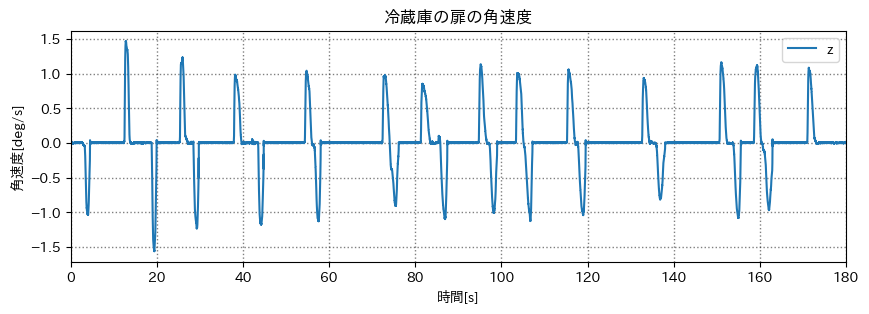

In [4]:
xlim = (0, 180)

plot(
    df_gyro,
    [("time", "z")],
    title="冷蔵庫の扉の角速度",
    xlabel="時間[s]",
    ylabel="角速度[deg/s]",
    figsize=(10, 3),
    xlim = xlim,
    grid=True
)


In [5]:
def extract_times(df):
    times = [
        [],
        []
    ]
    current_state = 0
    start_time = df.iloc[0]["time"]

    for index, row in df.iterrows():
        if current_state != row["state"]:
            if current_state != 0:
                times[int(current_state - 1)].append((start_time, row["time"]))
            start_time = row["time"]
            current_state = row["state"]

    return times


In [10]:
# 閾値を設定
threshold_open = 0.05
threshold_close = -0.05

# 閾値を超えたら開閉を判定(開ける:1 閉める:2 その他:0)
df_gyro["state"] = 0
df_gyro.loc[df_gyro["z"] > threshold_open, "state"] = 1
df_gyro.loc[df_gyro["z"] < threshold_close, "state"] = 2

# ラベルを付ける
times = extract_times(df_gyro)

# times の間隔が短いものを削除
times = [
    [time for time in times[0] if time[1] - time[0] > 0.5],
    [time for time in times[1] if time[1] - time[0] > 0.5]
]

print(len(times[0]), len(times[1]))

labels = [
    {
        "num": 1,
        "name": "開ける",
        "times": times[0]
    },
    {
        "num": 2,
        "name": "閉める",
        "times": times[1]
    }
]
print(labels)


13 13
[{'num': 1, 'name': '開ける', 'times': [(12.4464859, 13.66538696), (25.32655493, 26.87197845), (37.87555078, 39.53502734), (54.35172894, 55.88147699), (72.39114526, 74.01706225), (81.29453405, 83.35653674), (94.75574725, 96.47556842), (103.3861655, 105.0634972), (115.2414944, 117.0127457), (132.6877831, 134.2935233), (150.6661988, 152.3054759), (158.6635277, 160.2826708), (171.0642884, 172.7974857)]}, {'num': 2, 'name': '閉める', 'times': [(3.216365352, 4.439738949), (18.77804687, 19.91420685), (28.48225811, 29.71457348), (43.51374188, 44.78852679), (56.4875614, 58.01283545), (74.08415649, 76.13722851), (85.82783636, 87.42466473), (97.28069055, 98.99827697), (105.2848944, 107.2037682), (117.8200819, 119.5600297), (135.9999005, 138.008191), (153.9268586, 155.5996771), (160.7098192, 162.9573875)]}]


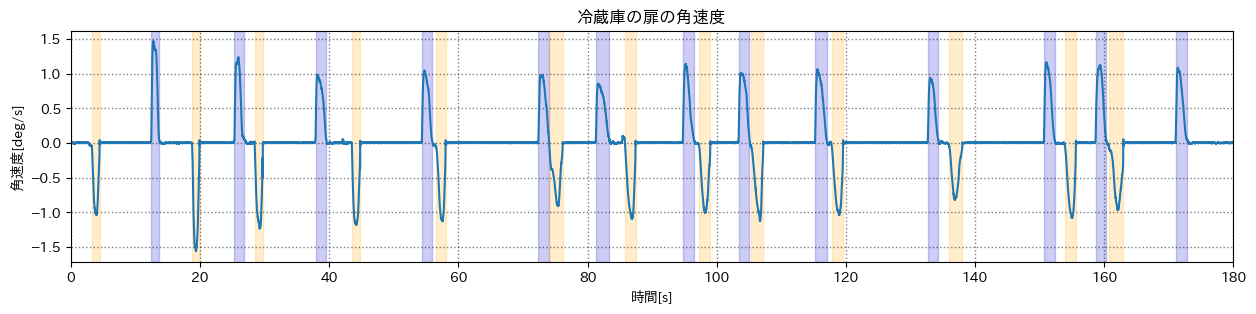

In [9]:
plot_with_label(
    df_gyro["time"],
    df_gyro["z"],
    title="冷蔵庫の扉の角速度",
    xlabel="時間[s]",
    ylabel="角速度[deg/s]",
    figsize=(15, 3),
    xlim = xlim,
    labels=labels
)